# Digit Recognition

Let's say we want to develop a model to recognize digits (for example, if we see ![image](picOf2.png) then we probably want our model to *output* the number 2). Most of machine learning relies on the idea that we can *train* models using data. For this demo, we'll be training our model on a dataset called [MNIST](http://yann.lecun.com/exdb/mnist/). To get started with the actual coding, we're going to need some **import** statements. These are very similar to Java's imports!

In [1]:
import pandas as pd              # used for getting dataframes
import matplotlib.pyplot as plt  # used for plotting
import numpy as np               # used for random selection at the end

Let's also load in some constants (which we'll use later).

In [2]:
'''
CONSTANTS
'''

NUM_EPOCHS = 300      # number of iterations we want to run through the data
NUM_TEST_IMAGES = 10  # number of test visualization images

Next, we're going to use the **pandas** library that we imported above to extract the data (which is currently in train.csv and test.csv) into a data structure we can actually work with.

In [3]:
dataframe_train = pd.read_csv("train.csv")
dataframe_test = pd.read_csv("test.csv")

Awesome! Now, let's try to see what the data actually looks like...

In [4]:
dataframe_train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The data is split into two parts: the label (which is the digit we're trying to predict), and the image, which is actually flattened into what looks like a one-dimensional array. This information is going to be important when we start thinking about the design of our model. Speaking of which, let's build our model!

To get started with this, we're going to use a popular framework called Pytorch.

In [5]:
import torch

Now, without further ado...

In [6]:
'''
MODEL
'''

# here, we use inheritance in Python (DigitRecognizer extends torch.nn.Module)
class DigitRecognizer(torch.nn.Module):

    # self is like the 'this' keyword in Java
    def __init__(self):
        '''
        This method is our constructor!
        '''
        
        super().__init__()
        
        #    syntax:  torch.nn.Linear(input dimensions, output dimensions)
        self.linear = torch.nn.Linear(784, 10)
        
    
    def forward(self, x):
        '''
        This method is how we "process" the input x to get the output y
        '''
        
        return self.linear(x)

Before all else, let's instantiate the model. In Python, the syntax for instantiating classes looks like:

In [7]:
model = DigitRecognizer()

The next step is to actually *train* the model. This is where our dataframe is going to come in handy! The actual training process here involves something called [backpropagation](https://en.wikipedia.org/wiki/Backpropagation); for our purposes, this is how we minimize the error (or *loss*) in our model's predictions.

In [8]:
# used to keep track of error (or loss)
loss_fn = torch.nn.CrossEntropyLoss()

# used to perform backpropagation
optimizer = torch.optim.Adam(model.parameters())

# let's split data into x (flattened input image) and y (label) after preprocessing
x_train, y_train = torch.tensor(dataframe_train.loc[:, dataframe_train.columns != "label"].to_numpy(),
                    dtype=torch.float32), torch.tensor(dataframe_train["label"])

x_test = torch.tensor(dataframe_test.to_numpy(), dtype=torch.float32)


'''
TRAINING THE MODEL
'''

# this is what for-loops most commonly look like in Python!
for i in range(NUM_EPOCHS):
    # reset optimizer's gradients to prevent accumulation
    optimizer.zero_grad()
    
    # get the model's prediction based on the input data
    y_pred = model(x_train)
    
    # compute loss of prediction
    loss = loss_fn(y_pred, y_train)
    
    # compute gradient for all weights based on prediction
    loss.backward()
    
    # backpropagate the gradients for all weights
    optimizer.step()
    
    if (i % 100 == 0):
        print("Training error (loss) at epoch %d:" % i, loss.item())
        print()

Training error (loss) at epoch 0: 68.83390808105469

Training error (loss) at epoch 100: 1.8535195589065552

Training error (loss) at epoch 200: 0.9931491613388062



Woohoo! Our model has been trained and the loss hopefully looks pretty low. Now comes the fun part: let's predict on some *test* data (for our purposes, test data is data that looks similar to the training data we just used except that we don't train on the test data; in practice, we'd want to also think about the distribution of our data and be very careful to avoid a problem called [data leaking](https://machinelearningmastery.com/data-leakage-machine-learning/)).

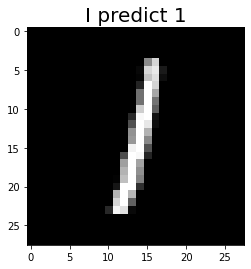

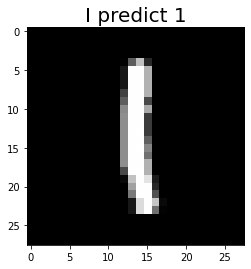

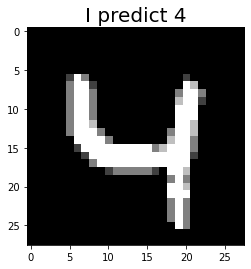

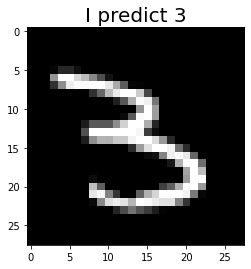

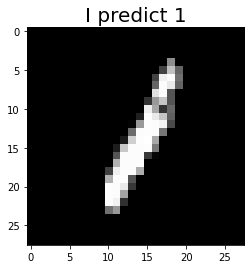

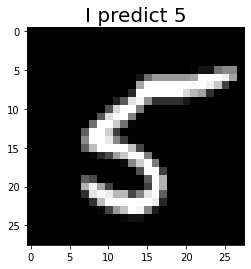

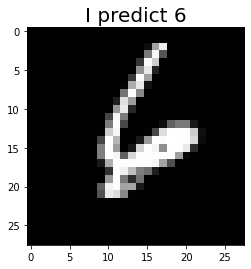

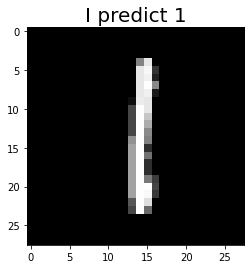

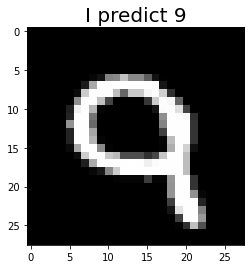

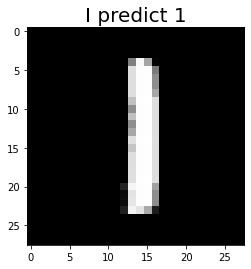

In [9]:
# randomize inputs so that we can see different visualizations each time we run cell
random_idxs = np.random.choice(np.arange(len(x_test)), size=NUM_TEST_IMAGES, replace=False)
x_test_random = x_test[random_idxs]

for i in range(NUM_TEST_IMAGES):
    # reshape row data into the original 28x28 image (2-dimensional array)
    x_img = x_test_random[i].reshape((28, 28))
    y_pred = np.argmax(model(x_test_random[i]).detach().numpy())

    # plot
    plt.title('I predict %d' % y_pred, fontsize=20)
    plt.imshow(x_img, cmap='gray')
    plt.show()

Yay! These results hopefully look pretty convincing! That's all for now, feel free to experiment with the code : -)